In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

In [3]:
mangaid = '1-43214'
redshift = 0.117997
plateifu = '8135-1902'

In [4]:
# open the file
data = fits.open('/Users/natachaupra/Downloads/manga-8135-1902-LOGCUBE.fits.gz')

In [5]:
flux = np.transpose(data['FLUX'].data, axes=(2, 1, 0))
ivar = np.transpose(data['IVAR'].data, axes=(2, 1, 0))
mask = np.transpose(data['MASK'].data, axes=(2, 1, 0))
wave = data['WAVE'].data

17 17


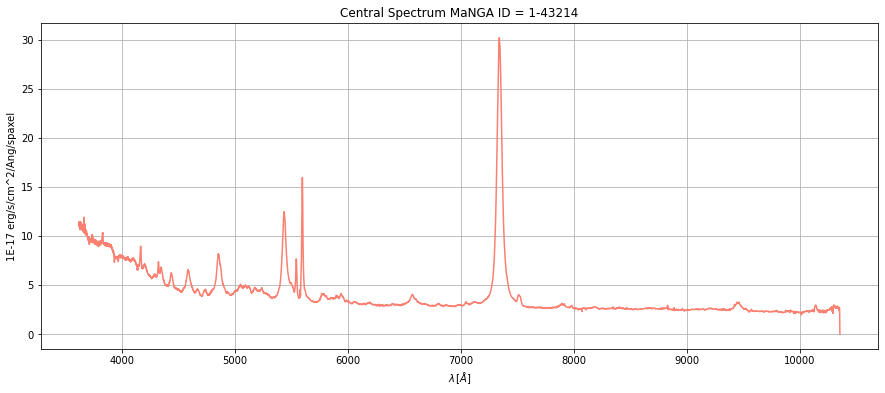

In [6]:
flux_header = data['FLUX'].header
x_center = int(flux_header['CRPIX1']) - 1
y_center = int(flux_header['CRPIX2']) - 1

print(x_center, y_center) 

plt.figure(figsize = (15, 6)) # Changing the figure size of the plot # OPTIONAL
plt.grid() # Add grid to the plot # OPTIONAL

# plt.ylim(0,2)

plt.plot(wave, flux[x_center, y_center], color = 'salmon')
# You can change the color of the plot if you want. 
# Choose here : https://matplotlib.org/stable/gallery/color/named_colors.html 

plt.xlabel('$\lambda \, [\AA]$') # Put label for the x-axis

plt.ylabel(flux_header['BUNIT']) # Put label for the y-axis 

plt.title(f'Central Spectrum MaNGA ID = {mangaid}') # Put title

plt.show()

In [7]:
do_not_use = (mask & 2**10) != 0

In [8]:
# sum flux density values element wise to get total flux density

n = len(flux) # to get the x and the y dimension. They are equal so I can use the same n for both times
sumflux = np.zeros(4563) # make empty array to collect the value. Sumflux is an array of 4563 zeros. I will add 
# the flux density into it
    
for i in range(n): # double for-loop to loop the x and the y direction 
    for j in range(n):
        flux[i,j] = flux[i,j] * ~do_not_use[i,j] # masking the bad pixels. I explained this part last time already
        # but if you are still confused lmk
        
        # add the masked flux density element-wise to the sumflux array. 
        sumflux = np.add(sumflux, flux[i,j])
        

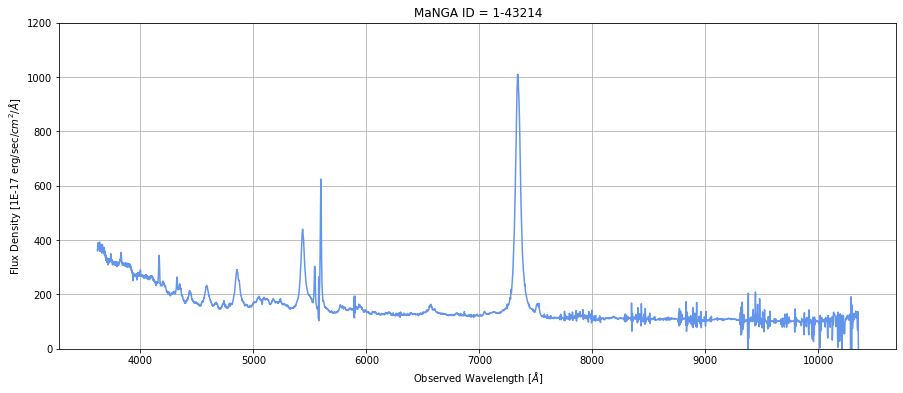

In [28]:
plt.figure(figsize = (15,6))
plt.grid()

# Setting the limit for x and y axis to sort of zoom the object. You can try playing with this 
# plt.xlim(7000,8000)

plt.ylim(0, 1200) # I'm limiting the flux density to above 0 only

plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title(f'MaNGA ID = {mangaid}')

plt.plot(wave, sumflux, color = 'cornflowerblue')

# If you wanna save the figure, you can use this format
# plt.savefig('path_and_name_of_file_(your_choice)', bbox_inches = 'tight')

In [10]:
rest_wave = wave / (1+redshift)

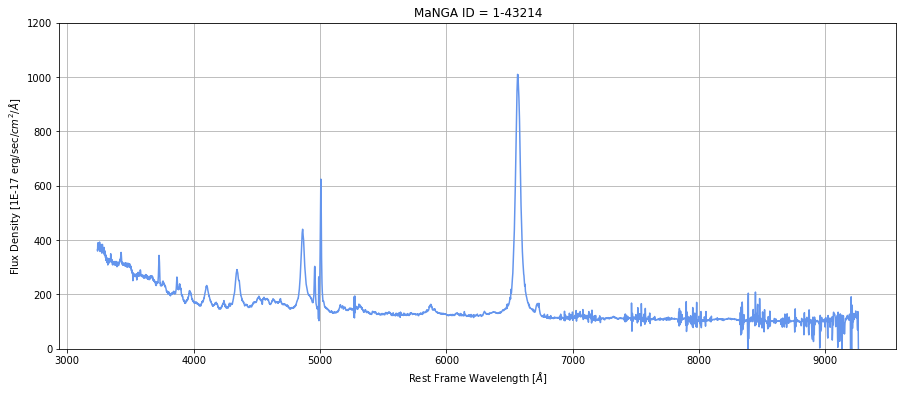

In [42]:
plt.figure(figsize = (15,6))
plt.grid()
plt.ylim(0, 1200)
plt.xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title(f'MaNGA ID = {mangaid}')
plt.plot(rest_wave, sumflux, color = 'cornflowerblue')

### [NII] - 6584

In [12]:
wavelength = 6584
lower_bound = 6500
upper_bound = 6650

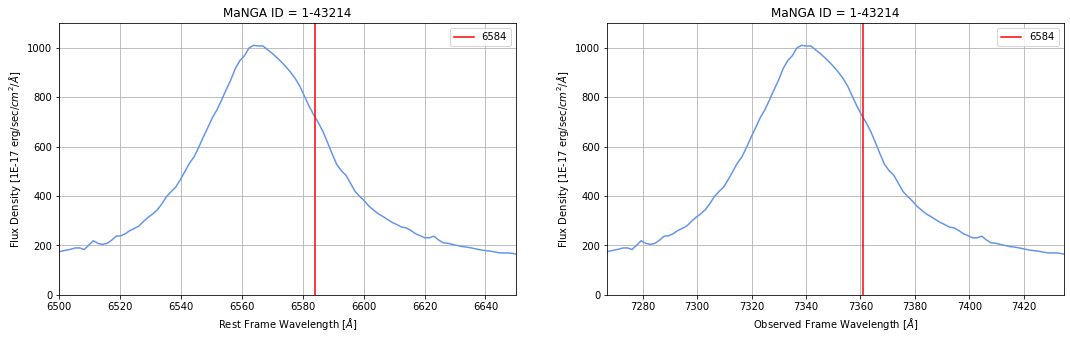

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(18)

ax1.grid()
ax1.set_ylim(0,1100)
ax1.set_xlim(lower_bound, upper_bound)
ax1.plot(rest_wave, sumflux, color = 'cornflowerblue')
ax1.set_xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
ax1.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax1.set_title(f'MaNGA ID = {mangaid}')
ax1.axvline(wavelength, label = f'{wavelength}', color = 'red')

ax1.legend()

ax2.grid()
ax2.set_ylim(0,1100)
ax2.plot(wave, sumflux, color = 'cornflowerblue')
ax2.set_xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
ax2.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax2.set_title(f'MaNGA ID = {mangaid}')
ax2.axvline(wavelength * (1 + redshift), label = f'{wavelength}', color = 'red')
ax2.set_xlim(lower_bound * (1 + redshift), upper_bound * (1 + redshift))
ax2.legend()

### H$\alpha$ - 6563

In [14]:
wavelength = 6563
lower_bound = 6500
upper_bound = 6600

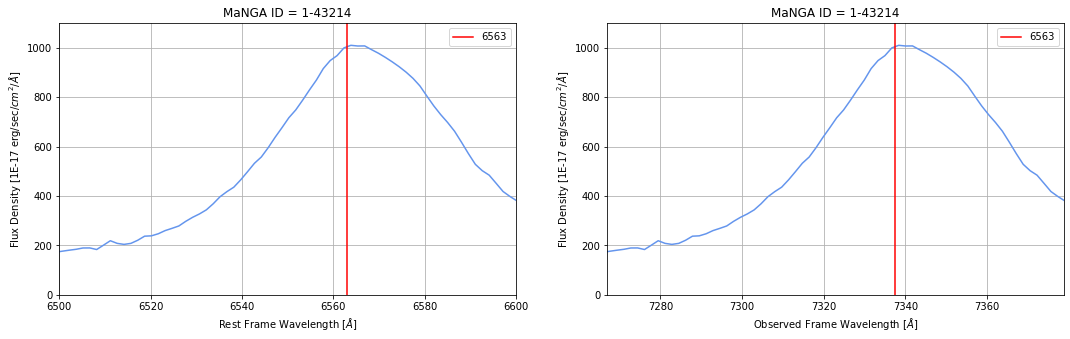

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(18)

ax1.grid()
ax1.set_ylim(0,1100)
ax1.plot(rest_wave, sumflux, color = 'cornflowerblue')
ax1.set_xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
ax1.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax1.set_title(f'MaNGA ID = {mangaid}')
ax1.axvline(wavelength, label = f'{wavelength}', color = 'red')
ax1.set_xlim(lower_bound, upper_bound)
ax1.legend()

ax2.grid()
ax2.set_ylim(0,1100)
ax2.plot(wave, sumflux, color = 'cornflowerblue')
ax2.set_xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
ax2.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax2.set_title(f'MaNGA ID = {mangaid}')
ax2.axvline(wavelength * (1 + redshift), label = f'{wavelength}', color = 'red')
ax2.set_xlim(lower_bound * (1 + redshift), upper_bound * (1 + redshift))
ax2.legend()

### [OIII] - 5007

In [30]:
wavelength = 5007
lower_bound = 4900
upper_bound = 5100

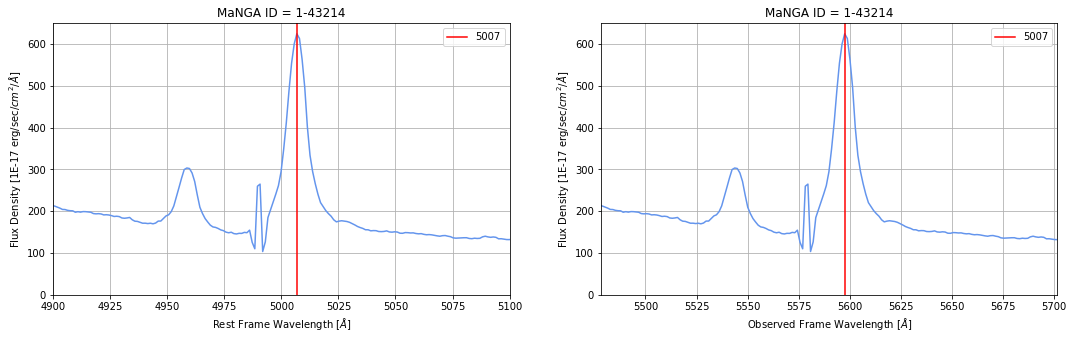

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(18)

ax1.grid()
ax1.set_ylim(0,650)
ax1.plot(rest_wave, sumflux, color = 'cornflowerblue')
ax1.set_xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
ax1.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax1.set_title(f'MaNGA ID = {mangaid}')
ax1.axvline(wavelength, label = f'{wavelength}', color = 'red')
ax1.set_xlim(lower_bound, upper_bound)
ax1.legend()

ax2.grid()
ax2.set_ylim(0,650)
ax2.plot(wave, sumflux, color = 'cornflowerblue')
ax2.set_xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
ax2.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax2.set_title(f'MaNGA ID = {mangaid}')
ax2.axvline(wavelength * (1 + redshift), label = f'{wavelength}', color = 'red')
ax2.set_xlim(lower_bound * (1 + redshift), upper_bound * (1 + redshift))
ax2.legend()

### [OIII] - 4959

In [18]:
wavelength = 4959
lower_bound = 4900
upper_bound = 5000

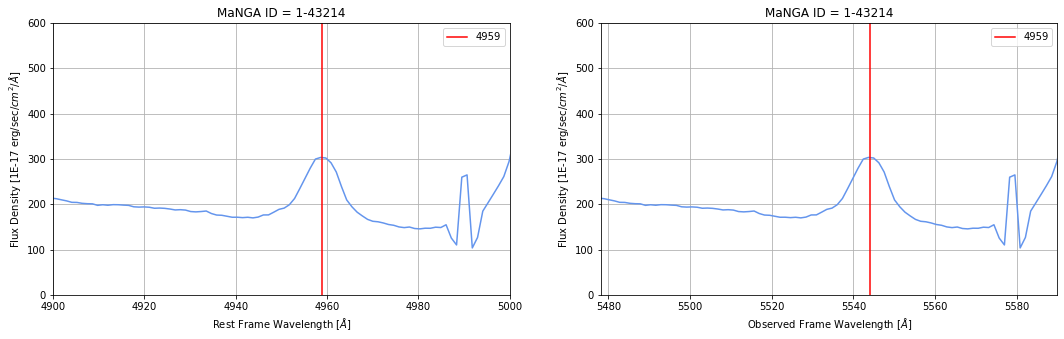

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(18)

ax1.grid()
ax1.set_ylim(0,600)
ax1.plot(rest_wave, sumflux, color = 'cornflowerblue')
ax1.set_xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
ax1.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax1.set_title(f'MaNGA ID = {mangaid}')
ax1.axvline(wavelength, label = f'{wavelength}', color = 'red')
ax1.set_xlim(lower_bound, upper_bound)
ax1.legend()

ax2.grid()
ax2.set_ylim(0,600)
ax2.plot(wave, sumflux, color = 'cornflowerblue')
ax2.set_xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
ax2.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax2.set_title(f'MaNGA ID = {mangaid}')
ax2.axvline(wavelength * (1 + redshift), label = f'{wavelength}', color = 'red')
ax2.set_xlim(lower_bound * (1 + redshift), upper_bound * (1 + redshift))
ax2.legend()

### H$\beta$ - 4861

In [20]:
wavelength = 4861
lower_bound = 4800
upper_bound = 4900

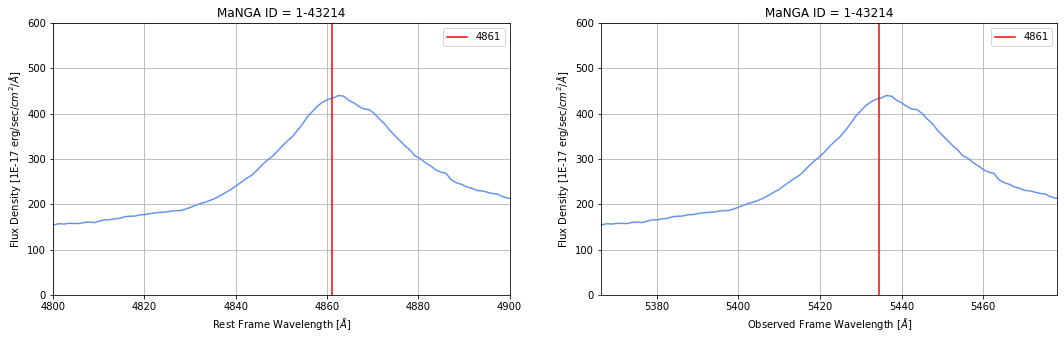

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(18)

ax1.grid()
ax1.set_ylim(0,600)
ax1.plot(rest_wave, sumflux, color = 'cornflowerblue')
ax1.set_xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
ax1.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax1.set_title(f'MaNGA ID = {mangaid}')
ax1.axvline(wavelength, label = f'{wavelength}', color = 'red')
ax1.set_xlim(lower_bound, upper_bound)
ax1.legend()

ax2.grid()
ax2.set_ylim(0,600)
ax2.plot(wave, sumflux, color = 'cornflowerblue')
ax2.set_xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
ax2.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax2.set_title(f'MaNGA ID = {mangaid}')
ax2.axvline(wavelength * (1 + redshift), label = f'{wavelength}', color = 'red')
ax2.set_xlim(lower_bound * (1 + redshift), upper_bound * (1 + redshift))
ax2.legend()

### [OIII] - 4363

In [22]:
wavelength = 4363
lower_bound = 4300
upper_bound = 4400

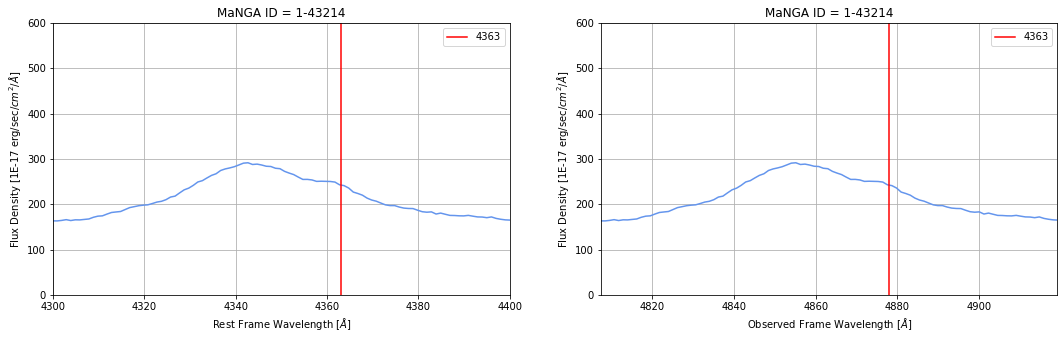

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(18)

ax1.grid()
ax1.set_ylim(0,600)
ax1.plot(rest_wave, sumflux, color = 'cornflowerblue')
ax1.set_xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
ax1.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax1.set_title(f'MaNGA ID = {mangaid}')
ax1.axvline(wavelength, label = f'{wavelength}', color = 'red')
ax1.set_xlim(lower_bound, upper_bound)
ax1.legend()

ax2.grid()
ax2.set_ylim(0,600)
ax2.plot(wave, sumflux, color = 'cornflowerblue')
ax2.set_xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
ax2.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax2.set_title(f'MaNGA ID = {mangaid}')
ax2.axvline(wavelength * (1 + redshift), label = f'{wavelength}', color = 'red')
ax2.set_xlim(lower_bound * (1 + redshift), upper_bound * (1 + redshift))
ax2.legend()

### [OII] - 3727

In [24]:
wavelength = 3727
lower_bound = 3800
upper_bound = 3650

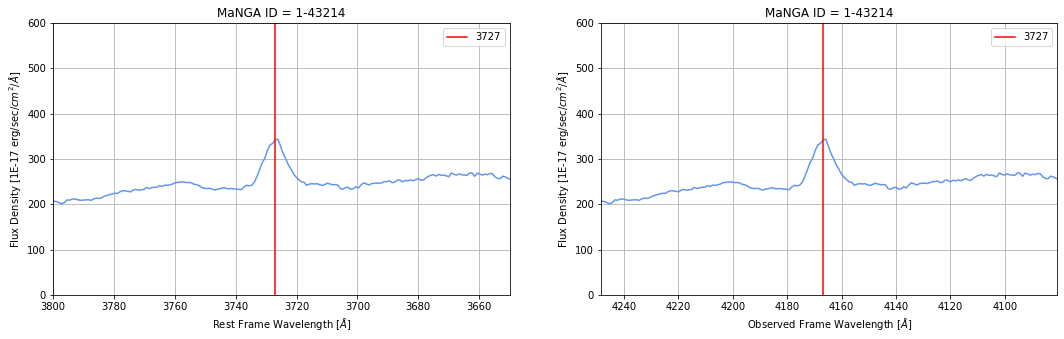

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(18)

ax1.grid()
ax1.set_ylim(0,600)
ax1.plot(rest_wave, sumflux, color = 'cornflowerblue')
ax1.set_xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
ax1.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax1.set_title(f'MaNGA ID = {mangaid}')
ax1.axvline(wavelength, label = f'{wavelength}', color = 'red')
ax1.set_xlim(lower_bound, upper_bound)
ax1.legend()

ax2.grid()
ax2.set_ylim(0,600)
ax2.plot(wave, sumflux, color = 'cornflowerblue')
ax2.set_xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
ax2.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax2.set_title(f'MaNGA ID = {mangaid}')
ax2.axvline(wavelength * (1 + redshift), label = f'{wavelength}', color = 'red')
ax2.set_xlim(lower_bound * (1 + redshift), upper_bound * (1 + redshift))
ax2.legend()